In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 
%matplotlib inline
plt.style.use('default')   
sns.set_context('notebook')


In [6]:
df = pd.read_csv('D:/ELEVATE-LABS/Task 5/train.csv')
print(df.shape)
df.head(10)


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df.info()                
df.describe(include='all').transpose()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [8]:
missing = df.isnull().sum().sort_values(ascending=False)
missing = pd.concat([missing, (missing / len(df)).rename('pct_missing')], axis=1)
missing.head(20)

df.duplicated().sum()


np.int64(0)

In [9]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')


--- PassengerId


count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64

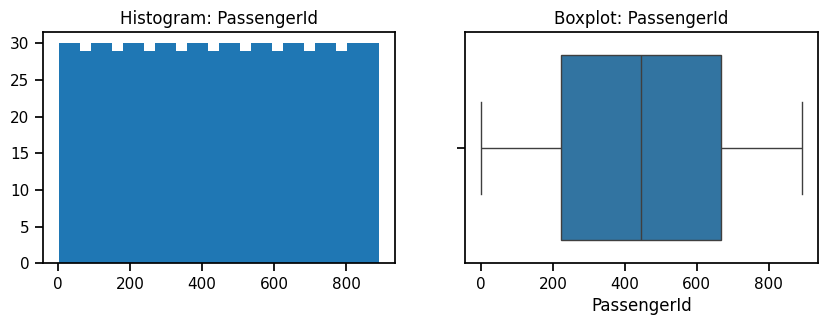

--- Survived


count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

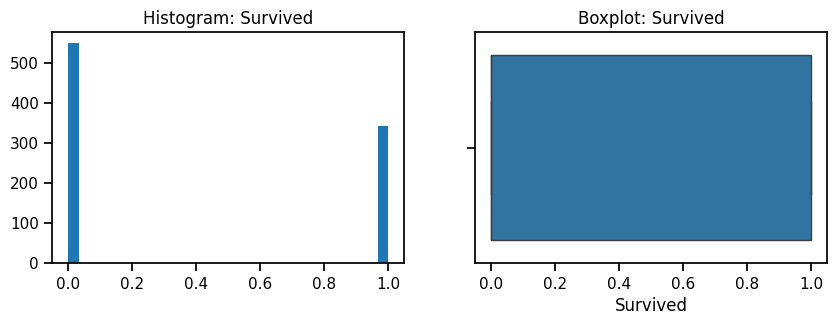

--- Pclass


count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

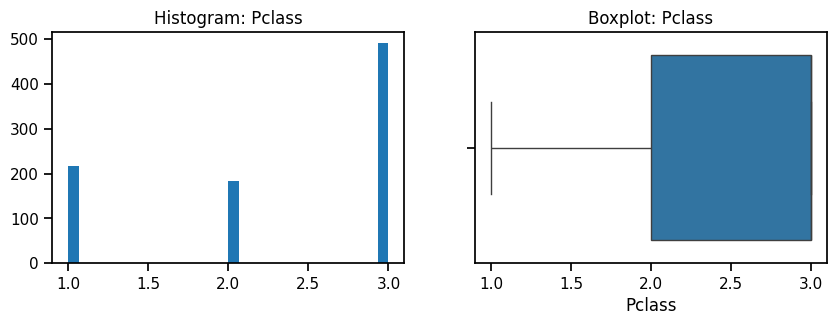

--- Age


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

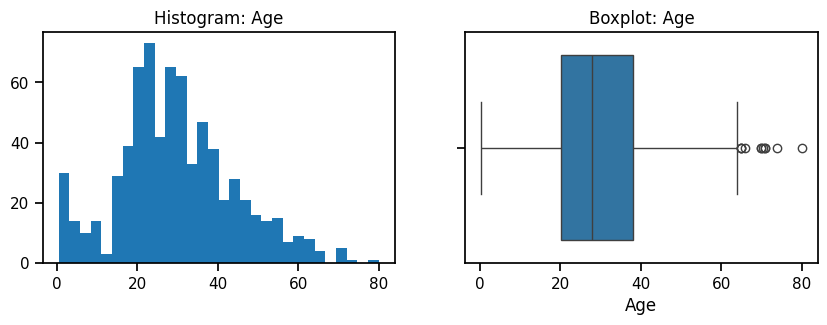

--- SibSp


count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

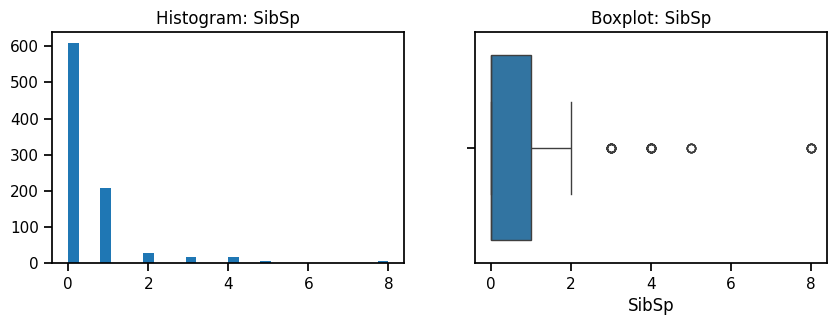

--- Parch


count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

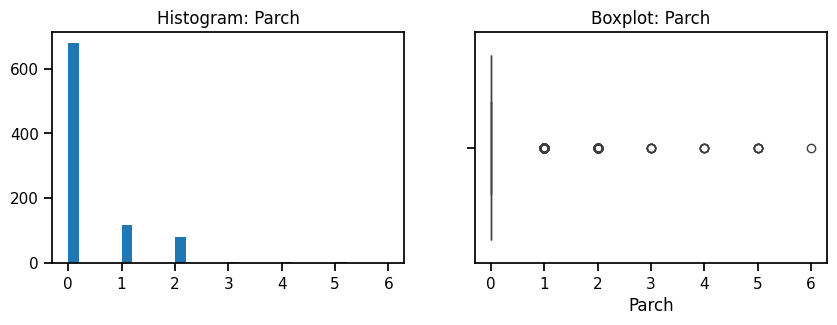

--- Fare


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

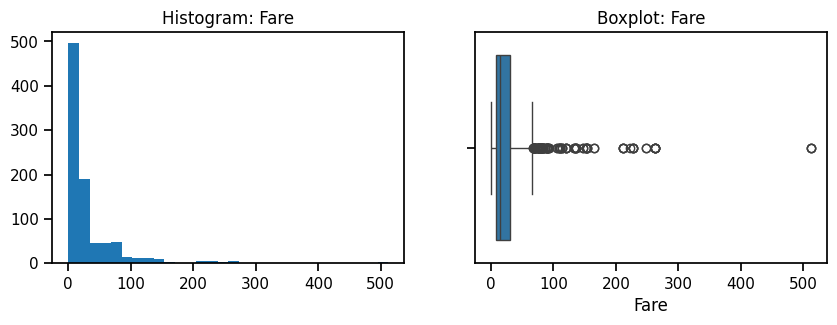

In [10]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in num_cols:
    print('---', col)
    display(df[col].describe())
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f'Histogram: {col}')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
    plt.show()


--- Name


Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
Allen, Mr. William Henry                               1
Moran, Mr. James                                       1
McCarthy, Mr. Timothy J                                1
Palsson, Master. Gosta Leonard                         1
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)      1
Nasser, Mrs. Nicholas (Adele Achem)                    1
Abelson, Mrs. Samuel (Hannah Wizosky)                  1
Vander Cruyssen, Mr. Victor                            1
Carlsson, Mr. Frans Olof                               1
Beckwith, Mrs. Richard Leonard (Sallie Monypeny)       1
Balkic, Mr. Cerin                                      1
Johnson, Master. Harold Theodor                        1
van Melkebeke, Mr. Philemo

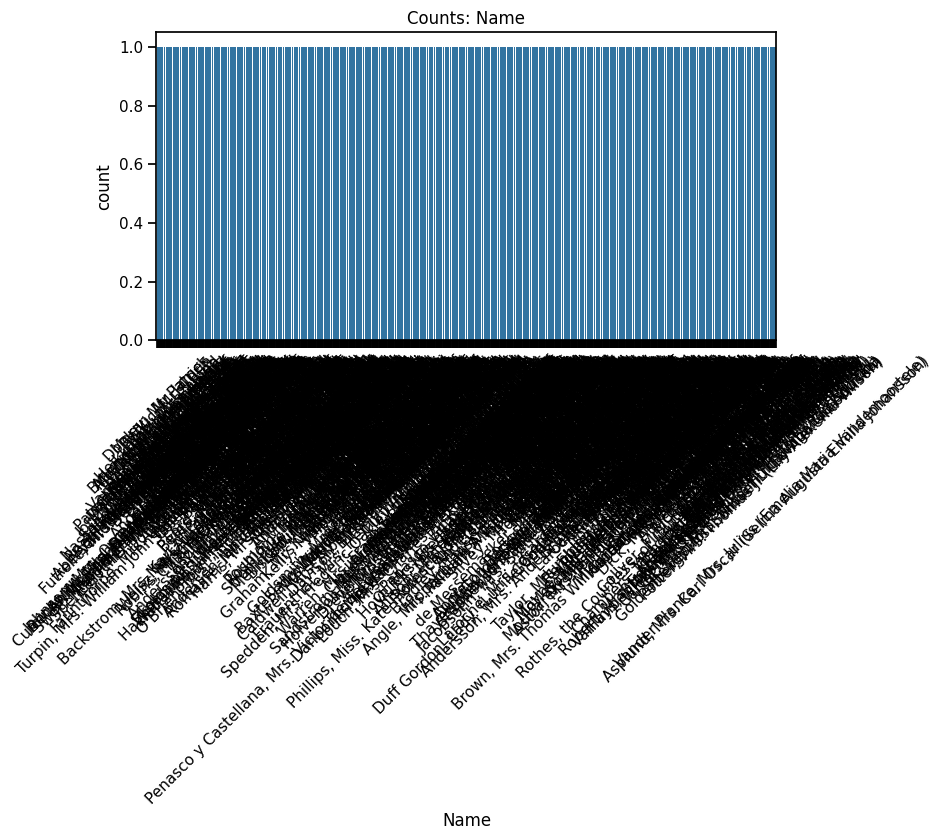

--- Sex


Sex
male      577
female    314
Name: count, dtype: int64

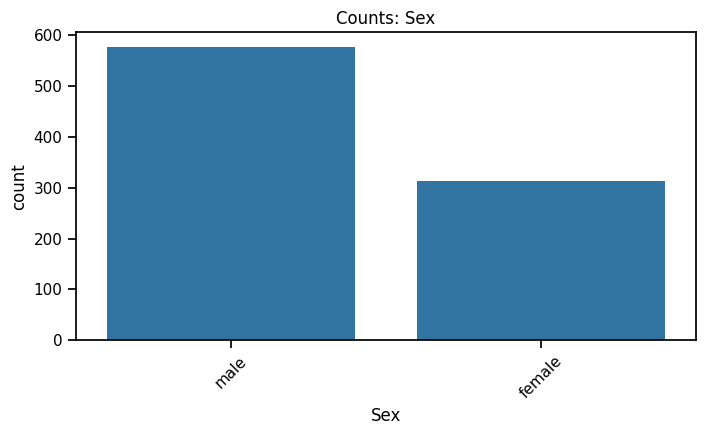

--- Ticket


Ticket
347082          7
1601            7
CA. 2343        7
3101295         6
CA 2144         6
347088          6
382652          5
S.O.C. 14879    5
113760          4
19950           4
349909          4
347077          4
4133            4
2666            4
113781          4
17421           4
W./C. 6608      4
LINE            4
PC 17757        4
363291          3
Name: count, dtype: int64

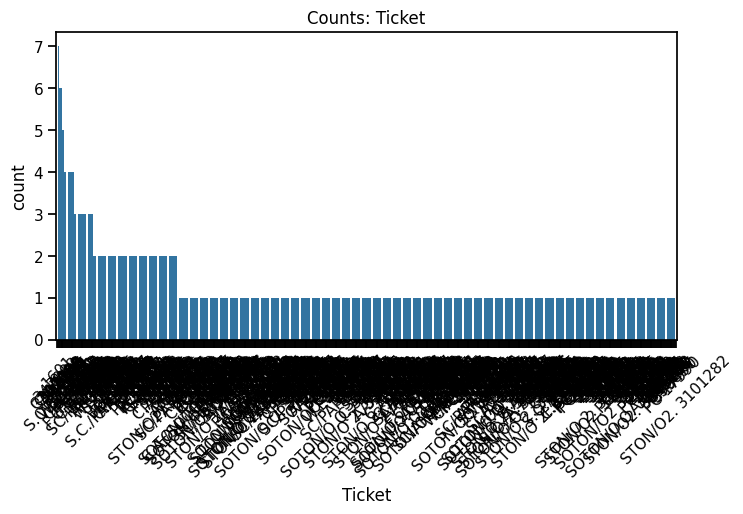

--- Cabin


Cabin
NaN            687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
D                3
E101             3
C22 C26          3
F33              3
C83              2
C123             2
B28              2
D26              2
B58 B60          2
E33              2
D33              2
C52              2
F G73            2
B77              2
C93              2
Name: count, dtype: int64

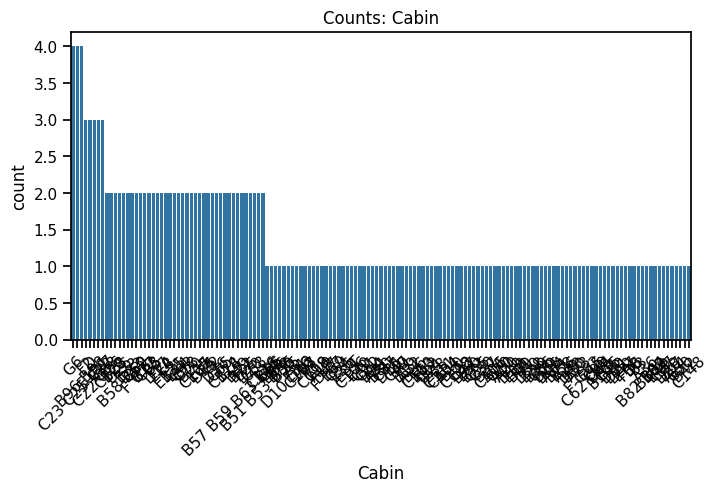

--- Embarked


Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

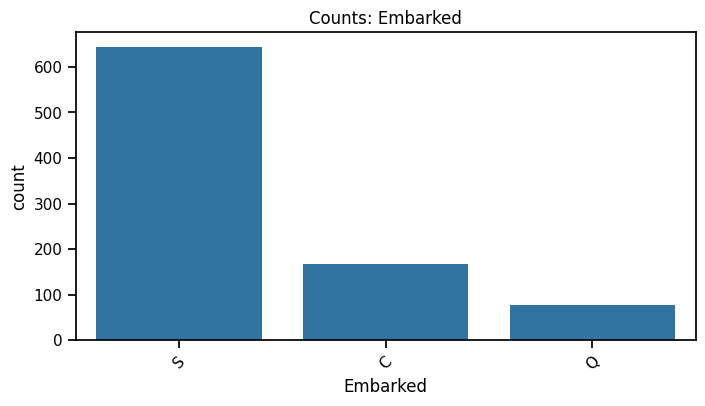

In [11]:
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
for col in cat_cols:
    print('---', col)
    display(df[col].value_counts(dropna=False).head(20))
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Counts: {col}')
    plt.show()


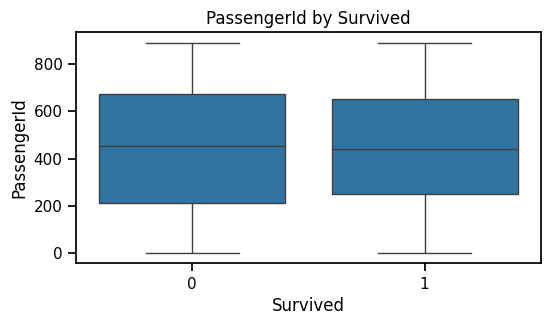

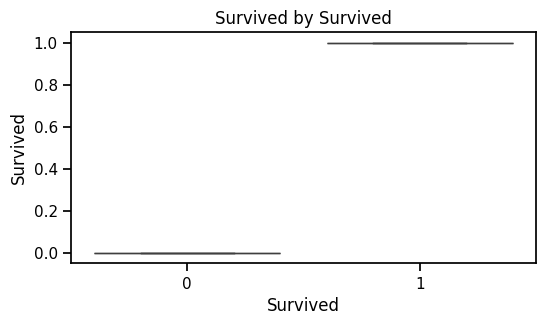

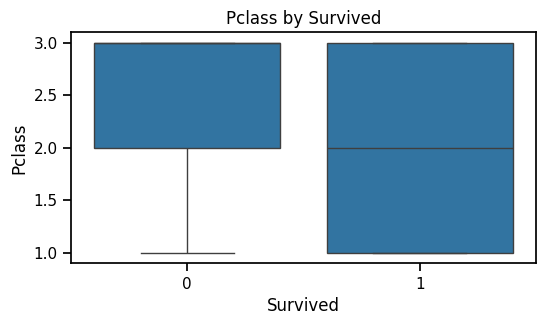

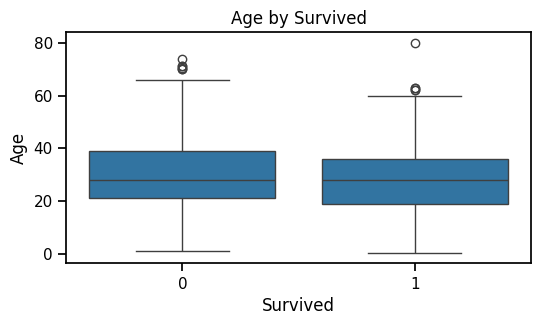

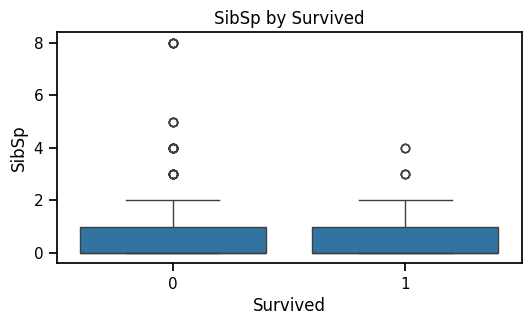

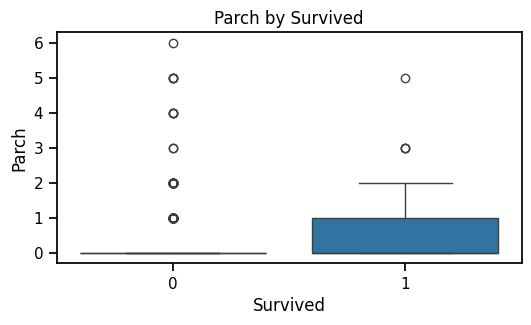

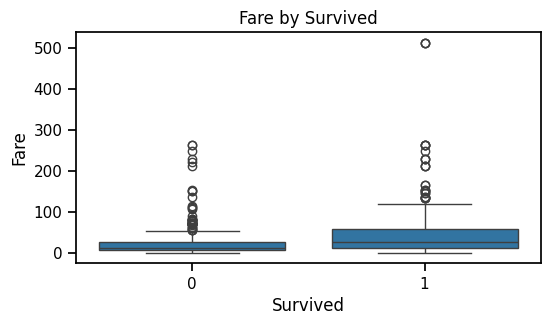

Survived,0,1
Name,,
"Abbing, Mr. Anthony",1.0,0.0
"Abbott, Mr. Rossmore Edward",1.0,0.0
"Abbott, Mrs. Stanton (Rosa Hunt)",0.0,1.0
"Abelson, Mr. Samuel",1.0,0.0
"Abelson, Mrs. Samuel (Hannah Wizosky)",0.0,1.0
...,...,...
"de Mulder, Mr. Theodore",0.0,1.0
"de Pelsmaeker, Mr. Alfons",1.0,0.0
"del Carlo, Mr. Sebastiano",1.0,0.0


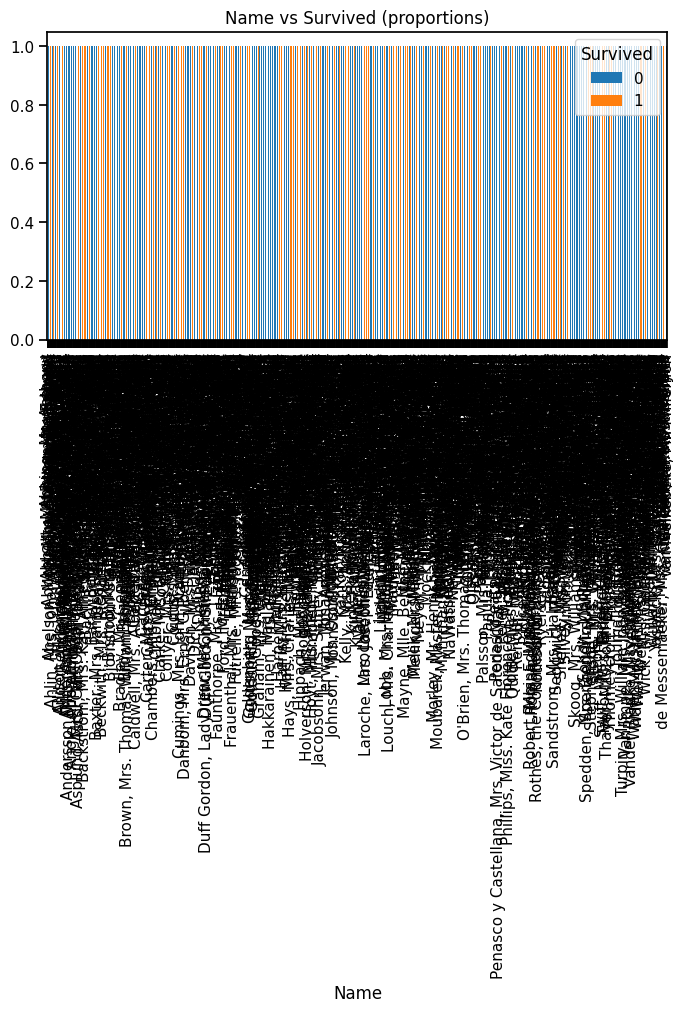

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


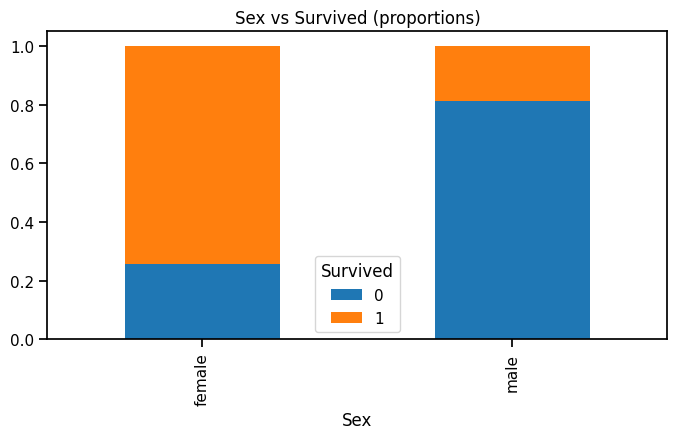

Survived,0,1
Ticket,,
110152,0.000000,1.000000
110413,0.333333,0.666667
110465,1.000000,0.000000
110564,0.000000,1.000000
110813,0.000000,1.000000
...,...,...
W./C. 6608,1.000000,0.000000
W./C. 6609,1.000000,0.000000
W.E.P. 5734,1.000000,0.000000


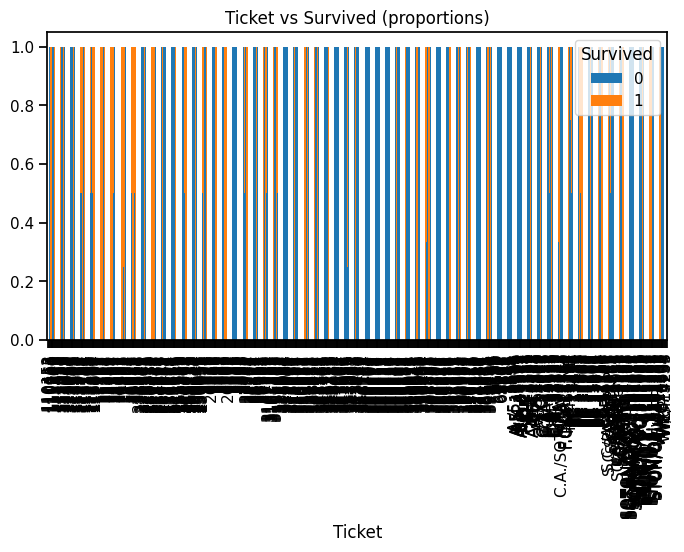

Survived,0,1
Cabin,,
A10,1.0,0.0
A14,1.0,0.0
A16,0.0,1.0
A19,1.0,0.0
A20,0.0,1.0
...,...,...
F33,0.0,1.0
F38,1.0,0.0
F4,0.0,1.0


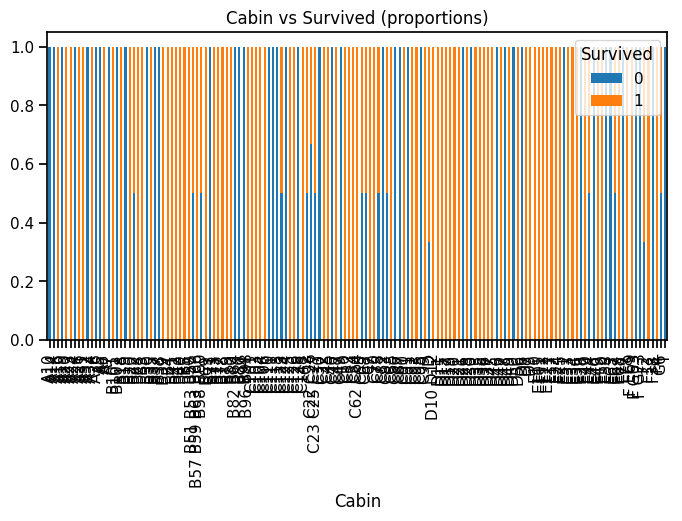

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


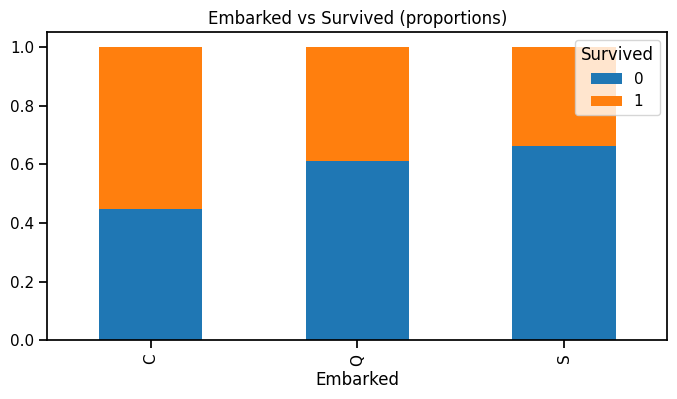

In [12]:
target = 'Survived'
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[target], y=df[col])
    plt.title(f'{col} by {target}')
    plt.show()

for col in cat_cols:
    ct = pd.crosstab(df[col], df[target], normalize='index')   
    display(ct)
    ct.plot(kind='bar', stacked=True, figsize=(8,4))
    plt.title(f'{col} vs {target} (proportions)')
    plt.show()


In [14]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(num_cols)


['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [15]:
remove_cols = ['PassengerId']   
num_cols = [col for col in num_cols if col not in remove_cols]


In [16]:
target = 'Survived'


In [17]:
subset = [col for col in num_cols if col != target][:5]
print(subset)


['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


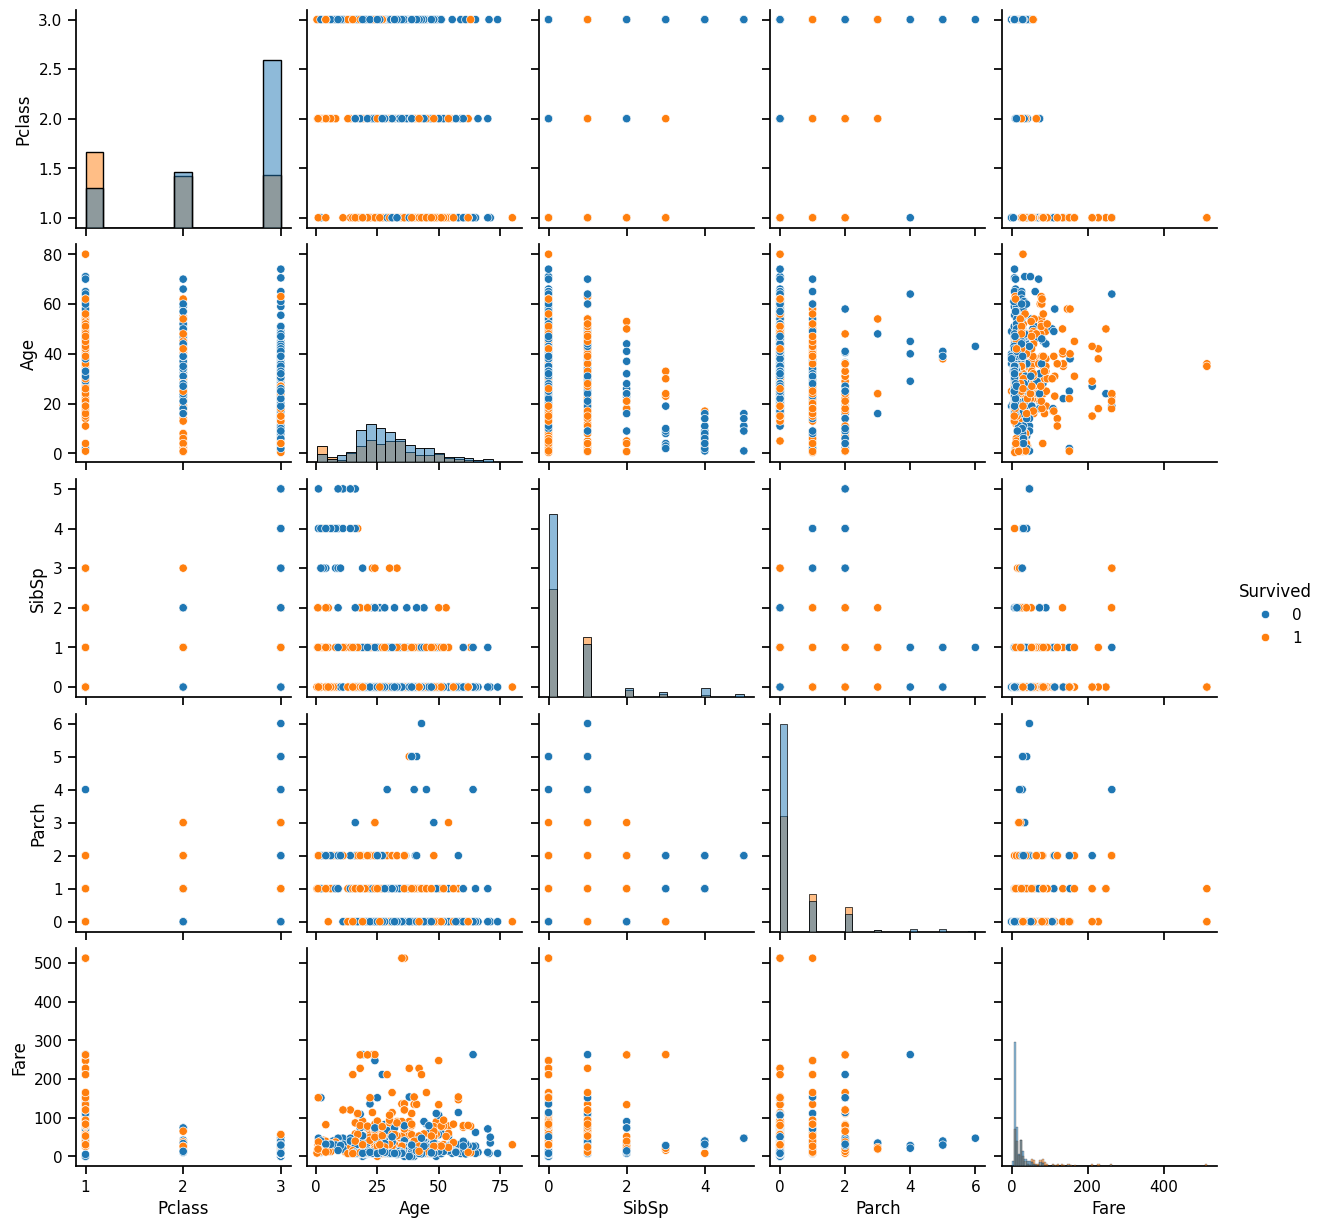

In [18]:
sns.pairplot(df[subset + [target]].dropna(), hue=target, diag_kind='hist')
plt.show()


In [19]:
for c in subset:
    print(c, df[c].apply(lambda x: isinstance(x, (list, np.ndarray))).any())


Pclass False
Age False
SibSp False
Parch False
Fare False


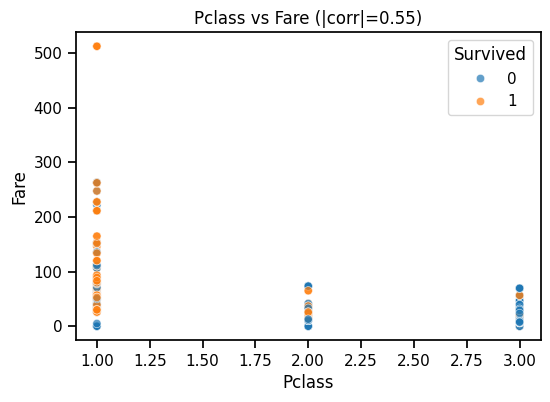

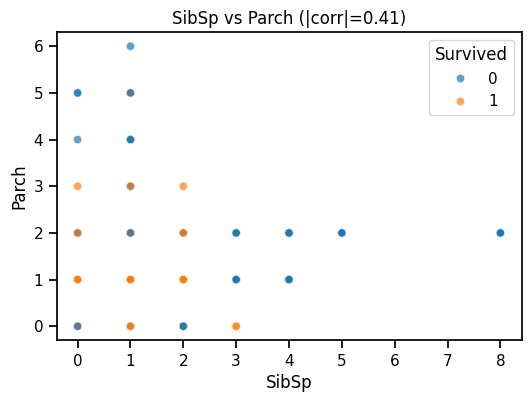

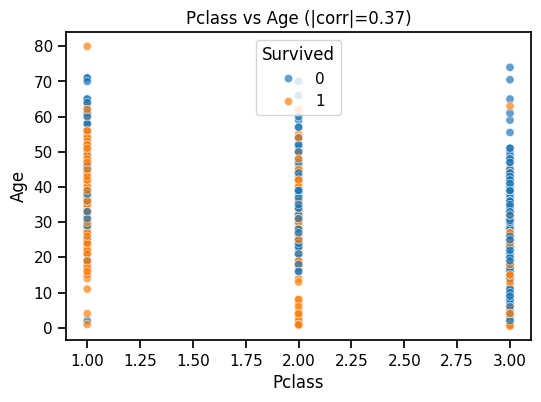

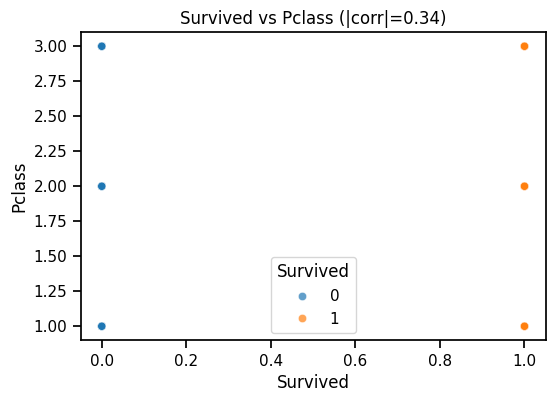

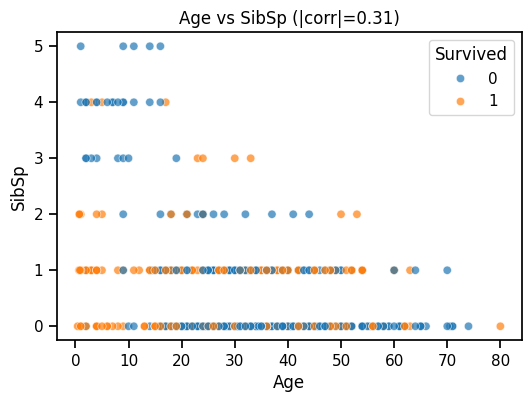

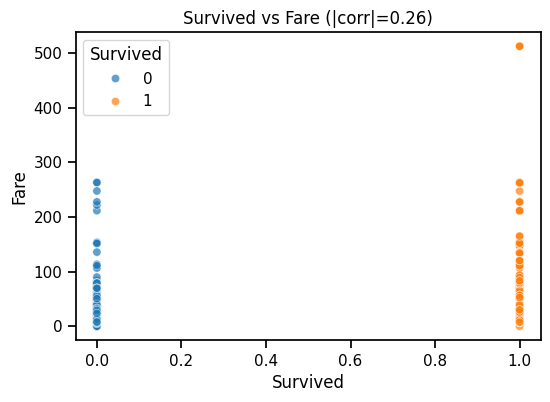

In [21]:
corr_unstack = corr.abs().where(np.triu(np.ones(corr.shape), k=1).astype(bool)).stack().sort_values(ascending=False)
top_pairs = corr_unstack.head(6)
top_pairs
for (c1,c2), val in top_pairs.items():
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=c1, y=c2, hue=target, alpha=0.7)
    plt.title(f'{c1} vs {c2} (|corr|={val:.2f})')
    plt.show()


In [22]:
col = 'Fare'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
len(outliers)


116

In [23]:
df['Age_imputed_median'] = df['Age'].fillna(df['Age'].median())
df['Embarked_filled'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [24]:
df['Age_bin'] = pd.cut(df['Age_imputed_median'], bins=[0,12,18,35,60,120], labels=['child','teen','young','adult','senior'])
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')[0].str.strip()


In [25]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('EDA_report.pdf') as pdf:
   
    plt.figure()
    sns.histplot(df['Age'].dropna())
    plt.title('Age distribution')
    pdf.savefig()
    plt.close()
 
